<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/2%20Logistic%20Regression/Logistic_Regression_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [1]:
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Linear regression hypothesis function:

$z = X \theta = \theta_0 + x_1 \theta_1 + x_2 \theta_2 + ... + x_m \theta_m$

Sigmoid Function will transform its input data between 0 and 1

$f(z) = \displaystyle\frac{1}{1+e^{-z}}$

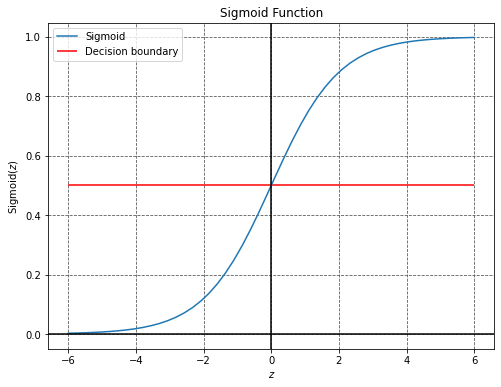

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(-6, 6, 50)
fig = plt.figure(figsize=(8,6))  
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.xlabel("$z$")
plt.ylabel("Sigmoid($z$)")
plt.grid(which='major', color='#555555', linestyle='--')
plt.title('Sigmoid Function')
plt.axvline(x=0, c="k")
plt.axhline(y=0, c="k")
plt.hlines(y=0.5, xmin=-6, xmax=6, color="r", label="Decision boundary")
plt.legend(loc='best')
plt.savefig("logistic_regression_sigmoid.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

Then apply Sigmoid function on the linear hypothesis function, we have the hyperthesis function for logistic regression:

$\begin{array}{rcl}
h_\theta(X) & = & \displaystyle\frac{1}{1+e^{-z}} \\
 & = & \displaystyle\frac{1}{1+e^{-(\theta_0 + x_1 \theta_1 + x_2 \theta_2 + ... + x_m \theta_m)}} \\
 & = & \displaystyle\frac{1}{1+e^{-X\theta}} 
\end{array}$



size of X (100, 2)
size of y (100,)


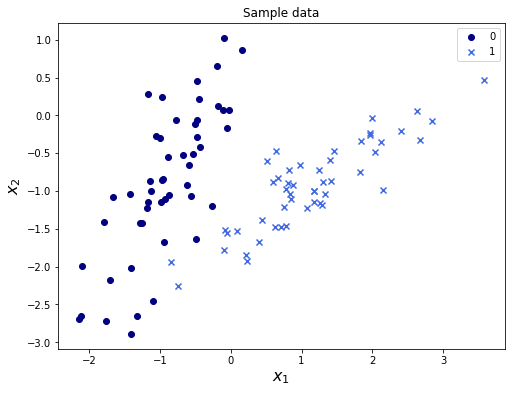

In [3]:
X, y = datasets.make_classification(n_samples=100,
                          n_features=2, 
                          n_redundant=0, 
                          n_informative=2, 
                          random_state=5,
                          n_clusters_per_class=1)
print("size of X", X.shape)
print("size of y", y.shape)

fig = plt.figure(figsize=(8,6))
colors = {0: 'navy', 1: 'royalblue'}
markers = {0:'o', 1: 'x'}
plt.title('Sample data')
for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X[ix,0], X[ix,1], c = colors[g], marker = markers[g], label = g)
plt.xlabel(r'$x_1$', fontsize=16)
plt.ylabel(r'$x_2$', fontsize=16)
plt.legend(loc='best')
plt.savefig("logistic_regression_sample_data.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

Run logistic regression

In [4]:
model = linear_model.LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [5]:
y_pred = model.predict(X)
print("Score:", model.score(X, y))
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Score: 0.98
Intercept: [-1.37987521]
Coefficient: [[ 3.16162505 -1.57119877]]


Plot Decision Boundary

Better explained how to get boundary line:
https://datascience.stackexchange.com/questions/49573/how-to-plot-logistic-regression-decision-boundary


https://statinfer.com/204-5-2-decision-boundary-logistic-regression/

https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/

In [6]:
def decision_boundary(x, intercept, coefficient):
    theta_0 = intercept
    theta_1, theta_2 = coefficient
    c = -theta_0/theta_2
    m = -theta_1/theta_2
    return m * x + c


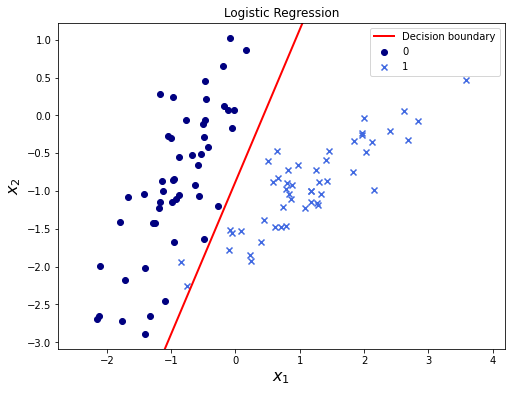

In [7]:
fig = plt.figure(figsize=(8,6))
colors = {0: 'navy', 1: 'royalblue'}
markers = {0:'o', 1: 'x'}
plt.title('Logistic Regression')
for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X[ix,0], X[ix,1], c = colors[g], marker = markers[g], label = g)
x_range = plt.xlim()
y_range = plt.ylim()
xd = np.array(x_range)
yd = decision_boundary(xd, model.intercept_[0], model.coef_[0])
plt.ylim(y_range)
plt.plot(xd, yd, 'r', lw=2, label="Decision boundary")
plt.xlabel(r'$x_1$', fontsize=16)
plt.ylabel(r'$x_2$', fontsize=16)
plt.legend(loc='best')
plt.savefig("logistic_regression_sample_data2.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

In [8]:
print("Accuracy Score:", metrics.accuracy_score(y, y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y, y_pred))

Accuracy Score: 0.98

Confusion Matrix:
 [[50  0]
 [ 2 48]]


Visualize Confusion Matrix

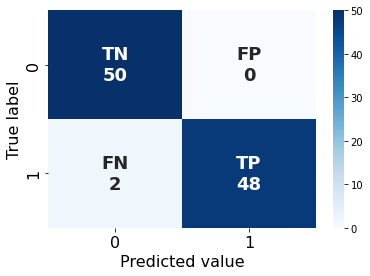

In [9]:
cm = metrics.confusion_matrix(y, y_pred)
cm_ = cm.astype(str)
labels = [['TN\n'+cm_[0][0],'FP\n'+cm_[0][1]],
          ['FN\n'+cm_[1][0],'TP\n'+cm_[1][1]]]
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', 
              annot_kws={
                'fontsize': 18,
                'fontweight': 'bold',
              })
plt.ylabel('True label', fontsize=16)
plt.xlabel('Predicted value', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("logistic_regression_confusion_matrix.svg", format="svg", transparent=True, bbox_inches='tight')

## Breast Cancer Dataset

In [10]:
data = datasets.load_breast_cancer()
print("Data:", data.data.shape)
print("Target:", data.target.shape)
print("Features:", data.feature_names)
# print("Description:", data.DESCR)
print("Keys:", data.keys())

Data: (569, 30)
Target: (569,)
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
scaler = preprocessing.StandardScaler()
X1 = scaler.fit_transform(data.data) 
y1 = data.target
print(X1.shape)
print(y1.shape)

(569, 30)
(569,)


In [12]:
X_train, X_test, y_train, y_test = \
      train_test_split(X1, y1, random_state=2, train_size = .75)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train: (426, 30)
y_train: (426,)
X_test:  (143, 30)
y_test:  (143,)


In [13]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)
ascore = metrics.accuracy_score(y_test, y_pred)
cmatrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy Score:\n", ascore)
print("Confusion Matrix:\n", cmatrix)

Accuracy Score:
 0.972027972027972
Confusion Matrix:
 [[55  1]
 [ 3 84]]


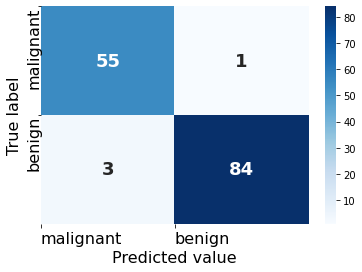

In [15]:
sns.heatmap(cmatrix, annot=True,  cmap='Blues', 
              annot_kws={'fontsize': 18,'fontweight': 'bold'})
plt.ylabel('True label', fontsize=16)
plt.xlabel('Predicted value', fontsize=16)
plt.xticks([0,1], ['malignant', 'benign'], rotation=0, ha="left", rotation_mode='anchor', fontsize=16)
plt.yticks([0,1], ['malignant', 'benign'], rotation=90, ha='right', rotation_mode='anchor', fontsize=16)
plt.savefig("logistic_regression_confusion_matrix2.svg", format="svg", transparent=True, bbox_inches='tight')